In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

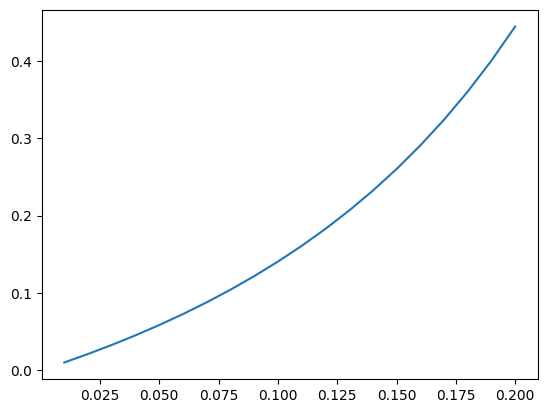

In [56]:
x = np.linspace(0.01, 0.20, 20)
var = x * (1 - x) / np.power((1 - 2 * x), 2)
plt.plot(x, var)

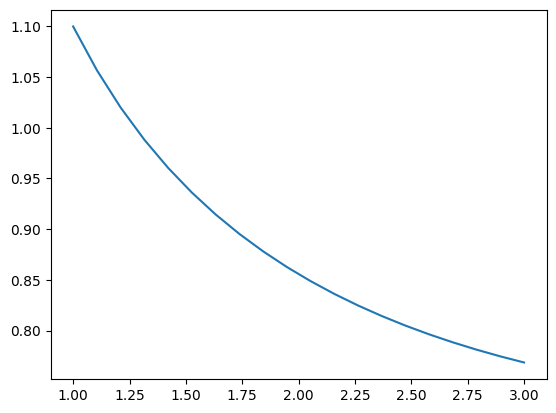

In [66]:
a = np.linspace(1, 3, 20)
x = 1.1
plt.plot(a, np.power(x, a) / np.sqrt(a))

In [3]:
def read_input(seed: int):
    with open(f"../tools/in/{seed:04}.txt", "r") as f:
        n, m, eps = f.readline().split()
        n, m, eps = int(n), int(m), float(eps)
        ds = []
        minos = []
        for _ in range(m):
            s = f.readline().split()
            d, v = int(s[0]), list(map(int, s[1:]))
            v = [(v[2 * i], v[2 * i + 1]) for i in range(d)]
            ds.append(d)
            minos.append(v)

    return n, m, eps, ds, minos

In [7]:
ms = []

for seed in range(1000):
    n, m, eps, ds, minos = read_input(seed)
    ms.append(m)

In [10]:
pd.Series(ms).describe()

count    1000.000000
mean        6.507000
std         3.904253
min         2.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        20.000000
dtype: float64

(array([249., 246., 187., 110.,  48.,  74.,  36.,  25.,  18.,   7.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

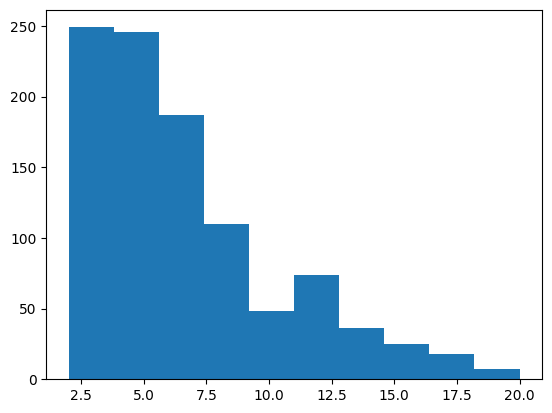

In [9]:
plt.hist(ms)